# MultiIndex

In [837]:
import pandas as pd

## This Module's Dataset

In [838]:
bigmac = pd.read_csv('bigmac.csv', parse_dates=['Date'], date_format='%Y-%m-%d')
bigmac['Country'] = bigmac['Country'].astype('category')
bigmac['Date'] = bigmac['Date'].astype('category')
bigmac.dtypes

Date                   category
Country                category
Price in US Dollars     float64
dtype: object

In [839]:
bigmac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Date                 1386 non-null   category
 1   Country              1386 non-null   category
 2   Price in US Dollars  1386 non-null   float64 
dtypes: category(2), float64(1)
memory usage: 17.5 KB


In [840]:
bigmac.nunique()

Date                     33
Country                  57
Price in US Dollars    1350
dtype: int64

## Create a MultiIndex
- A **MultiIndex** is an index with multiple levels or layers.
- Pass the `set_index` method a list of colum names to create a multi-index **DataFrame**.
- The order of the list's values will determine the order of the levels.
- Alternatively, we can pass the `read_csv` function's `index_col` parameter a list of columns.

In [841]:
bigmac.head()

,Date,Country,Price in US Dollars
0,2000-04-01,Argentina,2.500000
1,2000-04-01,Australia,1.541667
2,2000-04-01,Brazil,1.648045
3,2000-04-01,Canada,1.938776
4,2000-04-01,Switzerland,3.470588


In [842]:
bigmac.set_index(keys=['Date','Country'])

Price in US Dollars
Date       Country                           
2000-04-01 Argentina                 2.500000
           Australia                 1.541667
           Brazil                    1.648045
           Canada                    1.938776
           Switzerland               3.470588
...                                       ...
2020-07-01 Ukraine                   2.174714
           Uruguay                   4.327418
           United States             5.710000
           Vietnam                   2.847282
           South Africa              1.859349

[1386 rows x 1 columns]

In [843]:
bigmac.set_index(keys=['Country','Date']).sort_index()

Price in US Dollars
Country   Date                           
Argentina 2000-04-01             2.500000
          2001-04-01             2.500000
          2002-04-01             0.798722
          2003-04-01             1.423611
          2004-05-01             1.477966
...                                   ...
Vietnam   2018-07-01             2.821242
          2019-01-01             2.801845
          2019-07-09             2.797985
          2020-01-14             2.847774
          2020-07-01             2.847282

[1386 rows x 1 columns]

In [844]:
bigmac.set_index(keys=['Country','Date']).sort_index().loc['Argentina'].head(10)

,Price in US Dollars
Date,
2000-04-01,2.500000
2001-04-01,2.500000
2002-04-01,0.798722
2003-04-01,1.423611
2004-05-01,1.477966
2005-06-01,1.639627
2006-01-01,1.550362
2006-05-01,2.290201
2007-01-01,2.670983


In [845]:
bigmac = pd.read_csv('bigmac.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col=['Date','Country']).sort_index().head()

In [846]:
bigmac.index[0]

(Timestamp('2000-04-01 00:00:00'), 'Argentina')

## Extract Index Level Values
- The `get_level_values` method extracts an **Index** with the values from one level in the **MultiIndex**.
- Invoke the `get_level_values` on the **MultiIndex**, not the **DataFrame** itself.
- The method expects either the level's index position or its name.

In [847]:
bigmac = pd.read_csv('bigmac.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col=['Date','Country']).sort_index()
bigmac.head()

Price in US Dollars
Date       Country                       
2000-04-01 Argentina             2.500000
           Australia             1.541667
           Brazil                1.648045
           Britain               3.002000
           Canada                1.938776

In [848]:
bigmac.index.get_level_values('Date')
bigmac.index.get_level_values(0)

DatetimeIndex(['2000-04-01', '2000-04-01', '2000-04-01', '2000-04-01',
               '2000-04-01', '2000-04-01', '2000-04-01', '2000-04-01',
               '2000-04-01', '2000-04-01',
               ...
               '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01',
               '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01',
               '2020-07-01', '2020-07-01'],
              dtype='datetime64[ns]', name='Date', length=1386, freq=None)

In [849]:
bigmac.index.get_level_values('Country')
bigmac.index.get_level_values(1)

Index(['Argentina', 'Australia', 'Brazil', 'Britain', 'Canada', 'Chile',
       'China', 'Czech Republic', 'Denmark', 'Euro area',
       ...
       'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United States', 'Uruguay', 'Vietnam'],
      dtype='object', name='Country', length=1386)

## Rename Index Levels
- Invoke the `set_names` method on the **MultiIndex** to change one or more level names.
- Use the `names` and `level` parameter to target a nested index at a given level.
- Alternatively, pass `names` a list of strings to overwrite *all* level names.
- The `set_names` method returns a copy, so replace the original index to alter the **DataFrame**.

In [850]:
bigmac.index.set_names(names='Time', level=0)

MultiIndex([('2000-04-01',            'Argentina'),
            ('2000-04-01',            'Australia'),
            ('2000-04-01',               'Brazil'),
            ('2000-04-01',              'Britain'),
            ('2000-04-01',               'Canada'),
            ('2000-04-01',                'Chile'),
            ('2000-04-01',                'China'),
            ('2000-04-01',       'Czech Republic'),
            ('2000-04-01',              'Denmark'),
            ('2000-04-01',            'Euro area'),
            ...
            ('2020-07-01',               'Sweden'),
            ('2020-07-01',          'Switzerland'),
            ('2020-07-01',               'Taiwan'),
            ('2020-07-01',             'Thailand'),
            ('2020-07-01',               'Turkey'),
            ('2020-07-01',              'Ukraine'),
            ('2020-07-01', 'United Arab Emirates'),
            ('2020-07-01',        'United States'),
            ('2020-07-01',              'Uruguay

In [851]:
bigmac.index.set_names(names='Country', level=1)

MultiIndex([('2000-04-01',            'Argentina'),
            ('2000-04-01',            'Australia'),
            ('2000-04-01',               'Brazil'),
            ('2000-04-01',              'Britain'),
            ('2000-04-01',               'Canada'),
            ('2000-04-01',                'Chile'),
            ('2000-04-01',                'China'),
            ('2000-04-01',       'Czech Republic'),
            ('2000-04-01',              'Denmark'),
            ('2000-04-01',            'Euro area'),
            ...
            ('2020-07-01',               'Sweden'),
            ('2020-07-01',          'Switzerland'),
            ('2020-07-01',               'Taiwan'),
            ('2020-07-01',             'Thailand'),
            ('2020-07-01',               'Turkey'),
            ('2020-07-01',              'Ukraine'),
            ('2020-07-01', 'United Arab Emirates'),
            ('2020-07-01',        'United States'),
            ('2020-07-01',              'Uruguay

In [852]:
bigmac.index = bigmac.index.set_names(names=['Time', 'Location'])

In [853]:
bigmac.head()

Price in US Dollars
Time       Location                      
2000-04-01 Argentina             2.500000
           Australia             1.541667
           Brazil                1.648045
           Britain               3.002000
           Canada                1.938776

## The sort_index Method on a MultiIndex DataFrame
- Using the `sort_index` method, we can target all levels or specific levels of the **MultiIndex**.
- To apply a different sort order to different levels, pass a list of Booleans.

In [854]:
bigmac = pd.read_csv('bigmac.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col=['Date','Country'])
bigmac.sort_index(ascending=[True,False]).head()

Price in US Dollars
Date       Country                           
2000-04-01 United States             2.510000
           Thailand                  1.447368
           Taiwan                    2.287582
           Switzerland               3.470588
           Sweden                    2.714932

## Extract Rows from a MultiIndex DataFrame
- A **tuple** is an immutable list. It cannot be modified after creation.
- Create a tuple with a comma between elements. The community convention is to wrap the elements in parentheses.
- The `iloc` and `loc` accessors are available to extract rows by index position or label.
- For the `loc` accessor, pass a tuple to hold the labels from the index levels.

In [855]:
bigmac = pd.read_csv('bigmac.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col=['Date','Country']).sort_index()
bigmac.head()

Price in US Dollars
Date       Country                       
2000-04-01 Argentina             2.500000
           Australia             1.541667
           Brazil                1.648045
           Britain               3.002000
           Canada                1.938776

In [856]:
(1,2)
(1,)

(1,)

In [857]:
bigmac.iloc[2]

Price in US Dollars    1.648045
Name: (2000-04-01 00:00:00, Brazil), dtype: float64

In [858]:
bigmac.loc['2000-04-01','Canada']

Price in US Dollars    1.938776
Name: (2000-04-01 00:00:00, Canada), dtype: float64

In [859]:
bigmac.loc['2000-04-01','Price in US Dollars']

Country
Argentina         2.500000
Australia         1.541667
Brazil            1.648045
Britain           3.002000
Canada            1.938776
Chile             2.451362
China             1.195652
Czech Republic    1.390537
Denmark           3.078358
Euro area         2.380800
Hong Kong         1.309371
Hungary           1.215054
Indonesia         1.825047
Israel            3.580247
Japan             2.773585
Malaysia          1.189474
Mexico            2.221041
New Zealand       1.691542
Poland            1.279070
Russia            1.385965
Singapore         1.882353
South Africa      1.339286
South Korea       2.707581
Sweden            2.714932
Switzerland       3.470588
Taiwan            2.287582
Thailand          1.447368
United States     2.510000
Name: Price in US Dollars, dtype: float64

In [860]:
bigmac.loc[('2000-04-01','Canada'),]

Price in US Dollars    1.938776
Name: (2000-04-01 00:00:00, Canada), dtype: float64

In [861]:
bigmac.loc[('2000-04-01','Hungary'):('2000-04-01', 'Poland')]

Price in US Dollars
Date       Country                         
2000-04-01 Hungary                 1.215054
           Indonesia               1.825047
           Israel                  3.580247
           Japan                   2.773585
           Malaysia                1.189474
           Mexico                  2.221041
           New Zealand             1.691542
           Poland                  1.279070

In [862]:
bigmac.loc[:('2000-04-01', 'Poland')]

Price in US Dollars
Date       Country                            
2000-04-01 Argentina                  2.500000
           Australia                  1.541667
           Brazil                     1.648045
           Britain                    3.002000
           Canada                     1.938776
           Chile                      2.451362
           China                      1.195652
           Czech Republic             1.390537
           Denmark                    3.078358
           Euro area                  2.380800
           Hong Kong                  1.309371
           Hungary                    1.215054
           Indonesia                  1.825047
           Israel                     3.580247
           Japan                      2.773585
           Malaysia                   1.189474
           Mexico                     2.221041
           New Zealand                1.691542
           Poland                     1.279070

In [863]:
start = ('2000-04-01',)
end = ('2000-04-01',)
bigmac.loc[start:end]

Price in US Dollars
Date       Country                            
2000-04-01 Argentina                  2.500000
           Australia                  1.541667
           Brazil                     1.648045
           Britain                    3.002000
           Canada                     1.938776
           Chile                      2.451362
           China                      1.195652
           Czech Republic             1.390537
           Denmark                    3.078358
           Euro area                  2.380800
           Hong Kong                  1.309371
           Hungary                    1.215054
           Indonesia                  1.825047
           Israel                     3.580247
           Japan                      2.773585
           Malaysia                   1.189474
           Mexico                     2.221041
           New Zealand                1.691542
           Poland                     1.279070
           Russia                     1.385965
           Singapore                  1.882353
           South Africa               1.339286
           South Korea                2.707581
           Sweden                     2.714932
           Switzerland                3.470588
           Taiwan                     2.287582
           Thailand                   1.447368
           United States              2.510000

In [864]:
bigmac_new = pd.read_csv('bigmac.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col='Date').sort_index()
bigmac_new['Country'].loc[:'2001-01-01']

Date
2000-04-01         Argentina
2000-04-01         Australia
2000-04-01            Brazil
2000-04-01            Canada
2000-04-01       Switzerland
2000-04-01             Chile
2000-04-01             China
2000-04-01    Czech Republic
2000-04-01           Denmark
2000-04-01         Euro area
2000-04-01           Britain
2000-04-01         Hong Kong
2000-04-01           Hungary
2000-04-01         Indonesia
2000-04-01            Israel
2000-04-01             Japan
2000-04-01       South Korea
2000-04-01            Mexico
2000-04-01          Malaysia
2000-04-01       New Zealand
2000-04-01            Poland
2000-04-01            Russia
2000-04-01         Singapore
2000-04-01            Sweden
2000-04-01          Thailand
2000-04-01            Taiwan
2000-04-01     United States
2000-04-01      South Africa
Name: Country, dtype: object

In [865]:
bigmac_new = pd.read_csv('bigmac.csv', parse_dates=['Date'], date_format='%Y-%m-%d').sort_index()
bigmac_new = bigmac_new[bigmac_new['Date'] < '2001-01-01']
bigmac_new = bigmac_new.set_index('Country')
bigmac_new['Price in US Dollars'].sort_values()

Country
Malaysia          1.189474
China             1.195652
Hungary           1.215054
Poland            1.279070
Hong Kong         1.309371
South Africa      1.339286
Russia            1.385965
Czech Republic    1.390537
Thailand          1.447368
Australia         1.541667
Brazil            1.648045
New Zealand       1.691542
Indonesia         1.825047
Singapore         1.882353
Canada            1.938776
Mexico            2.221041
Taiwan            2.287582
Euro area         2.380800
Chile             2.451362
Argentina         2.500000
United States     2.510000
South Korea       2.707581
Sweden            2.714932
Japan             2.773585
Britain           3.002000
Denmark           3.078358
Switzerland       3.470588
Israel            3.580247
Name: Price in US Dollars, dtype: float64

## The transpose Method
- The `transpose` method inverts/flips the horizontal and vertical axes of the **DataFrame**.

In [866]:
bigmac = pd.read_csv('bigmac.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col=['Date','Country']).sort_index()
bigmac.head()

Price in US Dollars
Date       Country                       
2000-04-01 Argentina             2.500000
           Australia             1.541667
           Brazil                1.648045
           Britain               3.002000
           Canada                1.938776

In [867]:
start = ('2018-01-01', 'China')
end = ('2018-01-01', 'Denmark')
bigmac.loc[start:end].transpose()

Date                2018-01-01                                             
Country                  China  Colombia Costa Rica Czech Republic  Denmark
Price in US Dollars   3.171642  3.832468   4.027932       3.807779  4.93202

In [868]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

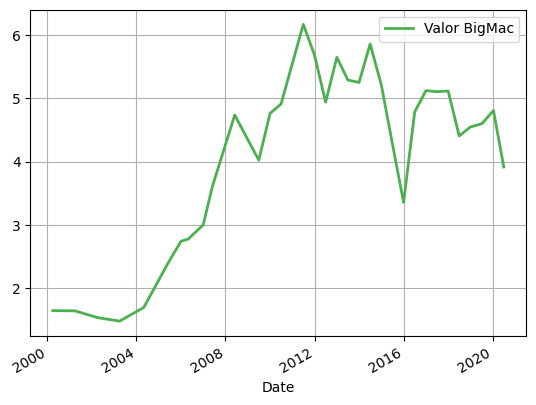

In [869]:
bigmac_brazil = pd.read_csv('bigmac.csv', parse_dates=['Date'])
is_brazil = bigmac_brazil['Country'] == 'Brazil'
bigmac_brazil = bigmac_brazil[is_brazil].sort_values(by='Date').set_index('Date')
bigmac_brazil.plot(
    y='Price in US Dollars', 
    legend=True, 
    linewidth=2, 
    label='Valor BigMac',
    linestyle='-',
    grid=True,
    c='#4CAF50',
    )

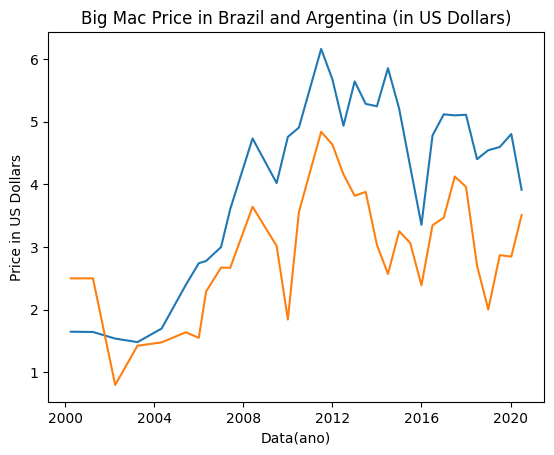

In [870]:
bigmac_example = pd.read_csv('bigmac.csv', parse_dates=['Date'])

is_brazil = bigmac_example['Country'] == 'Brazil'
is_argentina = bigmac_example['Country'] == 'Argentina'

bigmac_brazil = bigmac_example[is_brazil].sort_values(by='Date').set_index('Date')
bigmac_argentina = bigmac_example[is_argentina].sort_values(by='Date').set_index('Date')

# passar 2 arrays: x, y
plt.plot(bigmac_brazil.index, bigmac_brazil['Price in US Dollars'])
plt.plot(bigmac_argentina.index, bigmac_argentina['Price in US Dollars'])

# gerar o gráfico

# Títulos e rótulos
plt.title('Big Mac Price in Brazil and Argentina (in US Dollars)')
plt.xlabel('Data(ano)')
plt.ylabel('Price in US Dollars')
plt.show()


## The stack Method
- The `stack` method moves the column index to the row index.
- Pandas will return a **MultiIndex Series**.
- Think of it like "stacking" index levels for a **MultiIndex**.

In [871]:
world = pd.read_csv('worldstats.csv', index_col=['year','country']).sort_index()
world.head(10)

Population           GDP
year country                               
1960 Afghanistan    8994793.0  5.377778e+08
     Algeria       11124892.0  2.723638e+09
     Australia     10276477.0  1.856759e+10
     Austria        7047539.0  6.592694e+09
     Bahamas, The    109526.0  1.698023e+08
     Bangladesh    48200702.0  4.274894e+09
     Belgium        9153489.0  1.165872e+10
     Belize           92068.0  2.807248e+07
     Benin          2431620.0  2.261956e+08
     Bermuda          44400.0  8.446665e+07

In [872]:
world.stack()

year  country                
1960  Afghanistan  Population    8.994793e+06
                   GDP           5.377778e+08
      Algeria      Population    1.112489e+07
                   GDP           2.723638e+09
      Australia    Population    1.027648e+07
                                     ...     
2015  World        GDP           7.343364e+13
      Zambia       Population    1.621177e+07
                   GDP           2.120156e+10
      Zimbabwe     Population    1.560275e+07
                   GDP           1.389294e+10
Length: 22422, dtype: float64

In [873]:
world.stack().to_frame()

0
year country                             
1960 Afghanistan Population  8.994793e+06
                 GDP         5.377778e+08
     Algeria     Population  1.112489e+07
                 GDP         2.723638e+09
     Australia   Population  1.027648e+07
...                                   ...
2015 World       GDP         7.343364e+13
     Zambia      Population  1.621177e+07
                 GDP         2.120156e+10
     Zimbabwe    Population  1.560275e+07
                 GDP         1.389294e+10

[22422 rows x 1 columns]

## The unstack Method
- The `unstack` method moves a row index to the column index (the inverse of the `stack` method).
- By default, the `unstack` method will move the innermost index.
- We can customize the moved index with the `level` parameter.
- The `level` parameter accepts the level's index position or its name. It can also accept a list of positions/names.

In [874]:
world = world.stack()

In [875]:
world = world.unstack()
world.head()

Population           GDP
year country                               
1960 Afghanistan    8994793.0  5.377778e+08
     Algeria       11124892.0  2.723638e+09
     Australia     10276477.0  1.856759e+10
     Austria        7047539.0  6.592694e+09
     Bahamas, The    109526.0  1.698023e+08

In [876]:
world.unstack(level=0)

Population                                            \
year                        1960          1961          1962          1963   
country                                                                      
Afghanistan         8.994793e+06  9.164945e+06  9.343772e+06  9.531555e+06   
Albania                      NaN           NaN           NaN           NaN   
Algeria             1.112489e+07  1.140486e+07  1.169015e+07  1.198513e+07   
Andorra                      NaN           NaN           NaN           NaN   
Angola                       NaN           NaN           NaN           NaN   
...                          ...           ...           ...           ...   
West Bank and Gaza           NaN           NaN           NaN           NaN   
World               3.035056e+09  3.076121e+09  3.129064e+09  3.193947e+09   
Yemen, Rep.                  NaN           NaN           NaN           NaN   
Zambia              3.049586e+06  3.142848e+06  3.240664e+06  3.342894e+06   
Zimbabwe            3.752390e+06  3.876638e+06  4.006262e+06  4.140804e+06   

                                                                            \
year                        1964          1965          1966          1967   
country                                                                      
Afghanistan         9.728645e+06  9.935358e+06  1.014884e+07  1.036860e+07   
Albania                      NaN           NaN           NaN           NaN   
Algeria             1.229597e+07  1.262695e+07  1.298027e+07  1.335420e+07   
Andorra                      NaN           NaN           NaN           NaN   
Angola                       NaN           NaN           NaN           NaN   
...                          ...           ...           ...           ...   
West Bank and Gaza           NaN           NaN           NaN           NaN   
World               3.259355e+09  3.326054e+09  3.395866e+09  3.465297e+09   
Yemen, Rep.                  NaN           NaN           NaN           NaN   
Zambia              3.449266e+06  3.559687e+06  3.674088e+06  3.792864e+06   
Zimbabwe            4.279561e+06  4.422132e+06  4.568320e+06  4.718612e+06   

                                                ...           GDP  \
year                        1968          1969  ...          2006   
country                                         ...                 
Afghanistan         1.059979e+07  1.084951e+07  ...  7.057598e+09   
Albania                      NaN           NaN  ...  8.992642e+09   
Algeria             1.374438e+07  1.414444e+07  ...  1.170273e+11   
Andorra                      NaN           NaN  ...  3.536452e+09   
Angola                       NaN           NaN  ...  4.178948e+10   
...                          ...           ...  ...           ...   
West Bank and Gaza           NaN           NaN  ...  4.910100e+09   
World               3.535512e+09  3.609910e+09  ...  5.107451e+13   
Yemen, Rep.                  NaN           NaN  ...  1.908173e+10   
Zambia              3.916928e+06  4.047479e+06  ...  1.275686e+10   
Zimbabwe            4.874113e+06  5.036321e+06  ...  5.443896e+09   

                                                                            \
year                        2007          2008          2009          2010   
country                                                                      
Afghanistan         9.843842e+09  1.019053e+10  1.248694e+10  1.593680e+10   
Albania             1.070101e+10  1.288135e+10  1.204421e+10  1.192695e+10   
Algeria             1.349771e+11  1.710007e+11  1.372110e+11  1.612073e+11   
Andorra             4.010785e+09  4.001349e+09  3.649863e+09  3.346317e+09   
Angola              6.044892e+10  8.417803e+10  7.549238e+10  8.247091e+10   
...                          ...           ...           ...           ...   
West Bank and Gaza  5.505800e+09  6.673500e+09  7.268200e+09  8.913100e+09   
World               5.758343e+13  6.312856e+13  5.983553e+13  6.564782e+13   
Yemen, Rep.

In [877]:
world.unstack(level=1)

Population                                              \
country Afghanistan    Albania     Algeria  Andorra      Angola   
year                                                              
1960      8994793.0        NaN  11124892.0      NaN         NaN   
1961      9164945.0        NaN  11404859.0      NaN         NaN   
1962      9343772.0        NaN  11690152.0      NaN         NaN   
1963      9531555.0        NaN  11985130.0      NaN         NaN   
1964      9728645.0        NaN  12295973.0      NaN         NaN   
1965      9935358.0        NaN  12626953.0      NaN         NaN   
1966     10148841.0        NaN  12980269.0      NaN         NaN   
1967     10368600.0        NaN  13354197.0      NaN         NaN   
1968     10599790.0        NaN  13744383.0      NaN         NaN   
1969     10849510.0        NaN  14144437.0      NaN         NaN   
1970     11121097.0        NaN  14550033.0  24279.0         NaN   
1971     11412821.0        NaN  14960111.0  25560.0         NaN   
1972     11716896.0        NaN  15377095.0  26892.0         NaN   
1973     12022514.0        NaN  15804428.0  28231.0         NaN   
1974     12315553.0        NaN  16247113.0  29514.0         NaN   
1975     12582954.0        NaN  16709098.0  30706.0         NaN   
1976     12831361.0        NaN  17190236.0  31781.0         NaN   
1977     13056499.0        NaN  17690184.0  32769.0         NaN   
1978     13222547.0        NaN  18212331.0  33746.0         NaN   
1979     13283279.0        NaN  18760761.0  34819.0         NaN   
1980     13211412.0        NaN  19337723.0  36063.0         NaN   
1981     12996923.0        NaN  19943667.0  37502.0         NaN   
1982            NaN        NaN  20575701.0  39112.0         NaN   
1983            NaN        NaN  21228288.0  40862.0         NaN   
1984            NaN  2904429.0  21893857.0  42704.0         NaN   
1985            NaN  2964762.0  22565908.0  44597.0   9745209.0   
1986            NaN  3022635.0  23241276.0  46515.0  10023700.0   
1987            NaN  3083605.0  23917889.0  48458.0  10285712.0   
1988            NaN  3142336.0  24591493.0  50431.0  10544904.0   
1989            NaN  3227943.0  25257671.0  52449.0  10820992.0   
1990            NaN  3286542.0  25912364.0  54511.0  11127870.0   
1991            NaN  3266790.0  26554277.0  56674.0  11472173.0   
1992            NaN  3247039.0  27180921.0  58904.0  11848971.0   
1993            NaN  3227287.0  27785977.0  61003.0  12246786.0   
1994            NaN  3207536.0  28362015.0  62707.0  12648483.0   
1995            NaN  3187784.0  28904300.0  63854.0  13042666.0   
1996            NaN  3168033.0  29411839.0  64291.0  13424813.0   
1997            NaN  3148281.0  29887717.0  64147.0  13801868.0   
1998            NaN  3128530.0  30336880.0  63888.0  14187710.0   
1999            NaN  3108778.0  30766551.0  64161.0  14601983.0   
2000            NaN  3089027.0  31183658.0  65399.0  15058638.0   
2001     20531160.0  3060173.0  31590320.0  67770.0  15562791.0   
2002     21487079.0  3051010.0  31990387.0  71046.0  16109696.0   
2003     22507368.0  3039616.0  32394886.0  74783.0  16691395.0   
2004     23499850.0  3026939.0  32817225.0  78337.0  17295500.0   
2005     24399948.0  3011487.0  33267887.0  81223.0  17912942.0   
2006     25183615.0  2992547.0  33749328.0  83373.0  18541467.0   
2007     25877544.0  2970017.0  34261971.0  84878.0  19183907.0   
2008     26528741.0  2947314.0  34811059.0  85616.0  19842251.0   
2009     27207291.0  2927519.0  35401790.0  85474.0  20520103.0   
2010     27962207.0  2913021.0  36036159.0  84419.0  21219954.0   
2011     28809167.0  2904780.0  36717132.0  82326.0  21942296.0   
2012     29726803.0  2900247.0  37439427.0  79316.0  22685632.0   
2013     30682500.0  2896652.0  38186135.0  75902.0  23448202.0   
2014     31627506.0  2893654.0  38934334.0      NaN  24227524.0   
2015     32526562.0  2889167.0  39666519.0      NaN  25021974.0   

                                                       

## The pivot Method
- The `pivot` method reshapes data from a tall format to a wide format.
- Ask yourself which direction the data will expand in if you add more entries.
- A tall/long format expands down. A wide format expands out.
- The `index` parameter sets the horizontal index of the pivoted **DataFrame**.
- The `columns` parameter sets the column whose values will be the columns in the pivoted **DataFrame**.
- The `values` parameter set the values of the pivoted **DataFrame**. Pandas will populate the correct values based on the index and column intersections.

In [878]:
sales = pd.read_csv('salesmen.csv', parse_dates=['Date'])
sales['Salesman'] = sales['Salesman'].astype('category')
sales['Salesman'].unique()

['Sharon', 'Ronald', 'Dave', 'Alexander', 'Oscar']
Categories (5, object): ['Alexander', 'Dave', 'Oscar', 'Ronald', 'Sharon']

In [879]:
# converte os dados de uma coluna e várias colunas, considerando a data como index.
sales.pivot(index='Date', columns='Salesman').head()

Revenue                          
Salesman   Alexander  Dave Oscar Ronald Sharon
Date                                          
2025-01-01      4430  1864  5250   2639   7172
2025-01-02      8026  8278  8661   4951   6362
2025-01-03      5188  4226  7075   2703   5982
2025-01-04      3144  3868  2524   4258   7917
2025-01-05       938  2287  2793   7771   7837

In [880]:
# Cria um DataFrame pivotado com um MultiIndex nas colunas, onde a primeira camada é Revenue e a segunda é o nome do vendedor (Dave, John, etc.).
sales = pd.read_csv('salesmen.csv', parse_dates=['Date'])
dave_sales = sales.pivot(index='Date', columns='Salesman') 
sum(dave_sales['Revenue']['Dave']) # Acessa a coluna de receita ('Revenue') do vendedor 'Dave'.

1849911

In [881]:
sum(sales['Revenue'][sales['Salesman'] == 'Dave'])

1849911

## The melt Method
- The `melt` method is the inverse of the `pivot` method.
- It takes a 'wide' dataset and converts it to a 'tall' dataset.
- The `melt` method is ideal when you have multiple columns storing the *same* data point.
- Ask yourself whether the column's values are a *type* of the column header. If they're not, the data is likely stored in a wide format.
- The `id_vars` parameters accepts the column whose values will be repeated for every column.
- The `var_name` parameter sets the name of the new column for the varying values (the former column names).
- The `value_name` parameter set the new name of the values column (holding the values from the original **DataFrame**).

In [882]:
quarters = pd.read_csv('quarters.csv')
quarters

,Salesman,Q1,Q2,Q3,Q4
0,Boris,602908,233879,354479,32704
1,Piers,43790,514863,297151,544493
2,Tommy,392668,113579,430882,247231
3,Travis,834663,266785,749238,570524
4,Cindy,580935,411379,110390,651572
5,Rob,656644,70803,375948,321388
6,Mike,486141,600753,742716,404995
7,Stacy,479662,742806,770712,2501
8,Alexandra,992673,879183,37945,293710


In [895]:
# direciona todas demais colunas para uma específica centrada
quarters.melt(id_vars='Salesman')

,Salesman,variable,value
0,Boris,Q1,602908
1,Piers,Q1,43790
2,Tommy,Q1,392668
3,Travis,Q1,834663
4,Cindy,Q1,580935
5,Rob,Q1,656644
6,Mike,Q1,486141
7,Stacy,Q1,479662
8,Alexandra,Q1,992673
9,Boris,Q2,233879


In [896]:
quarters.melt(id_vars='Salesman', var_name='Quarter').head()

,Salesman,Quarter,value
0,Boris,Q1,602908
1,Piers,Q1,43790
2,Tommy,Q1,392668
3,Travis,Q1,834663
4,Cindy,Q1,580935


In [909]:
quarters[['Q1','Q2','Q3','Q4']].mean().values.mean()

np.float64(440074.8055555555)

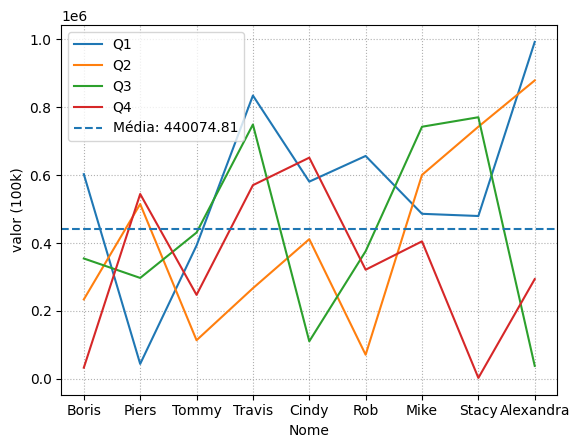

In [911]:
quarters = pd.read_csv('quarters.csv')

q1 = quarters['Q1'].values
q2 = quarters['Q2'].values
q3 = quarters['Q3'].values
q4 = quarters['Q4'].values

plt.plot(q1, label='Q1')
plt.plot(q2, label='Q2')
plt.plot(q3, label='Q3')
plt.plot(q4, label='Q4')

# linha da média
media = quarters[['Q1','Q2','Q3','Q4']].mean().values.mean()
plt.axhline(y=media, label=f'Média: {media:.2f}', linestyle='--')

# Rótulos personalizados para o eixo X
salesman_labels = quarters['Salesman'].values
plt.xticks(ticks=range(len(salesman_labels)), labels=salesman_labels)

plt.xlabel('Nome')
plt.ylabel('valor (100k)')
plt.grid(which='major', linestyle=':')

plt.legend()

plt.show()

In [ ]:
import matplotlib.lines
matplotlib.lines.Line2D.lineStyles

{'-': '_draw_solid',
 '--': '_draw_dashed',
 '-.': '_draw_dash_dot',
 ':': '_draw_dotted',
 'None': '_draw_nothing',
 ' ': '_draw_nothing',
 '': '_draw_nothing'}

## The pivot_table Method
- The `pivot_table` method operates similarly to the Pivot Table feature in Excel.
- A pivot table is a table whose values are aggregations of groups of values from another table.
- The `values` parameter accepts the numeric column whose values will be aggregated.
- The `aggfunc` parameter declares the aggregation function (the default is mean/average).
- The `index` parameter sets the index labels of the pivot table. MultiIndexes are permitted.
- The `columns` parameter sets the column labels of the pivot table. MultiIndexes are permitted.

In [917]:
foods = pd.read_csv('foods.csv')
foods.head()

,First Name,Gender,City,Frequency,Item,Spend
0,Wanda,Female,Stamford,Weekly,Burger,15.66
1,Eric,Male,Stamford,Daily,Chalupa,10.56
2,Charles,Male,New York,Never,Sushi,42.14
3,Anna,Female,Philadelphia,Once,Ice Cream,11.01
4,Deborah,Female,Philadelphia,Daily,Chalupa,23.49


In [918]:
foods.nunique()

First Name    198
Gender          2
City            3
Frequency       8
Item            6
Spend         950
dtype: int64

In [921]:
# traz uma média da coluna SPEND por valores únicos em GENDER. 
foods.pivot_table(values='Spend', index='Gender', aggfunc='mean')

,Spend
Gender,
Female,50.709629
Male,49.397623


In [922]:
foods.pivot_table(values='Spend', index='Gender', aggfunc='sum')

,Spend
Gender,
Female,25963.33
Male,24106.04


In [923]:
foods.pivot_table(values='Spend', index='Item', aggfunc='sum')

,Spend
Item,
Burger,7765.73
Burrito,8270.44
Chalupa,7644.52
Donut,8758.76
Ice Cream,8886.99
Sushi,8742.93


In [926]:
foods.pivot_table(values='Spend', index=['Gender','Item'], aggfunc='sum')

Spend
Gender Item              
Female Burger     4094.30
       Burrito    4257.82
       Chalupa    4152.26
       Donut      4743.00
       Ice Cream  4032.87
       Sushi      4683.08
Male   Burger     3671.43
       Burrito    4012.62
       Chalupa    3492.26
       Donut      4015.76
       Ice Cream  4854.12
       Sushi      4059.85

In [927]:
foods.pivot_table(values='Spend', index=['Gender','Item'], aggfunc='sum', columns='City')

City              New York  Philadelphia  Stamford
Gender Item                                       
Female Burger      1239.04       1639.24   1216.02
       Burrito      978.95       1458.76   1820.11
       Chalupa      876.58       1673.33   1602.35
       Donut       1446.78       1639.26   1656.96
       Ice Cream   1521.62       1479.22   1032.03
       Sushi       1480.29       1742.88   1459.91
Male   Burger      1294.09        938.18   1439.16
       Burrito     1399.40       1312.93   1300.29
       Chalupa     1227.77       1114.23   1150.26
       Donut       1345.27       1249.36   1421.13
       Ice Cream   1603.63       2191.27   1059.22
       Sushi       1396.15       1395.88   1267.82

In [928]:
foods.pivot_table(values='Spend', index='Item', aggfunc='sum', columns=['Gender', 'City'])

Gender      Female                           Male                      
City      New York Philadelphia Stamford New York Philadelphia Stamford
Item                                                                   
Burger     1239.04      1639.24  1216.02  1294.09       938.18  1439.16
Burrito     978.95      1458.76  1820.11  1399.40      1312.93  1300.29
Chalupa     876.58      1673.33  1602.35  1227.77      1114.23  1150.26
Donut      1446.78      1639.26  1656.96  1345.27      1249.36  1421.13
Ice Cream  1521.62      1479.22  1032.03  1603.63      2191.27  1059.22
Sushi      1480.29      1742.88  1459.91  1396.15      1395.88  1267.82

In [929]:
foods.pivot_table(values='Spend', index='Item', aggfunc='count', columns=['Gender', 'City'])

Gender      Female                           Male                      
City      New York Philadelphia Stamford New York Philadelphia Stamford
Item                                                                   
Burger          24           31       27       22           21       31
Burrito         23           28       34       25           30       28
Chalupa         19           32       25       25           23       23
Donut           31           30       34       30           33       29
Ice Cream       27           32       22       29           41       25
Sushi           31           30       32       27           28       18

In [930]:
foods.pivot_table(values='Spend', index='Item', aggfunc='max', columns=['Gender', 'City'])

Gender      Female                           Male                      
City      New York Philadelphia Stamford New York Philadelphia Stamford
Item                                                                   
Burger       98.96        97.79    85.06    90.32        99.68    97.20
Burrito      92.25        96.79    99.21    98.04        93.27    95.07
Chalupa      98.43        99.29    98.78    96.44        98.40    99.87
Donut        95.63        96.52    91.75    86.70        93.12    99.26
Ice Cream    97.83        88.14    97.44    97.65        99.24    99.17
Sushi        99.51        99.02    95.43    93.85        97.12    98.48